In [2]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(15,10)})

In [3]:
wh = pd.read_csv('https://raw.githubusercontent.com/RyuuKenshi/Mental-Health-and-Suicides/master/datasets/who_suicide_statistics.csv')

In [4]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
wh.dropna(inplace=True)

In [6]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      36060 non-null  object 
 1   year         36060 non-null  int64  
 2   sex          36060 non-null  object 
 3   age          36060 non-null  object 
 4   suicides_no  36060 non-null  float64
 5   population   36060 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [7]:
wh.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [8]:
from IPython.display import display, HTML
display(wh.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,36060,118,Netherlands,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,36060,NaN,NaN,NaN,1998.94,10.1639,1979,1991,2000,2008,2016
sex,36060,2,female,18030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,36060,6,25-34 years,6010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,36060,NaN,NaN,NaN,221.81,855.449,0,2,21,116,22338
population,36060,NaN,NaN,NaN,1.7e+06,3.69781e+06,259,80566,375765,1.3449e+06,4.38052e+07


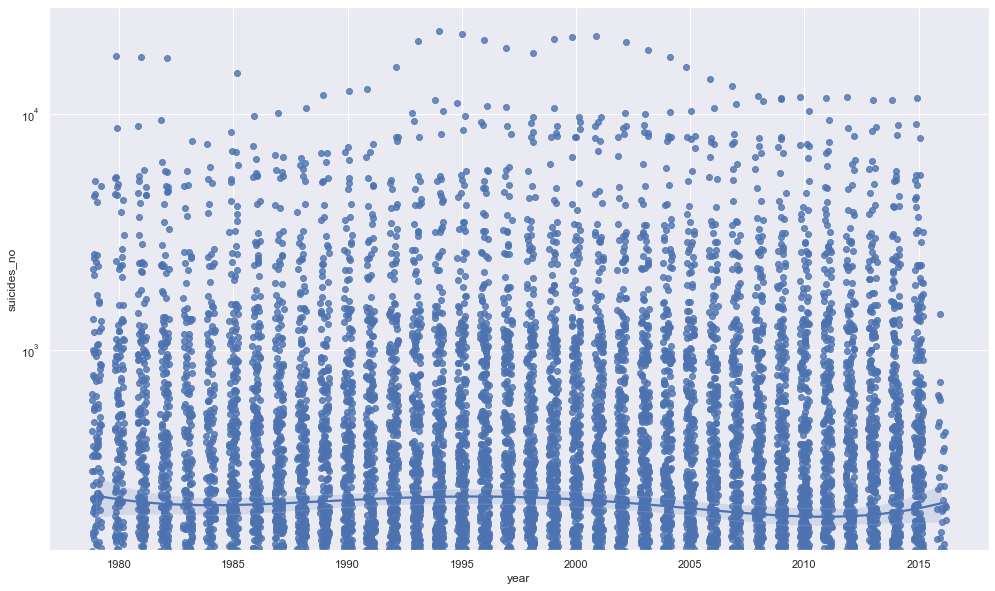

In [9]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.regplot(data=wh, x='year', y='suicides_no', x_jitter=0.2, order=4)
ax.set_yscale('log')

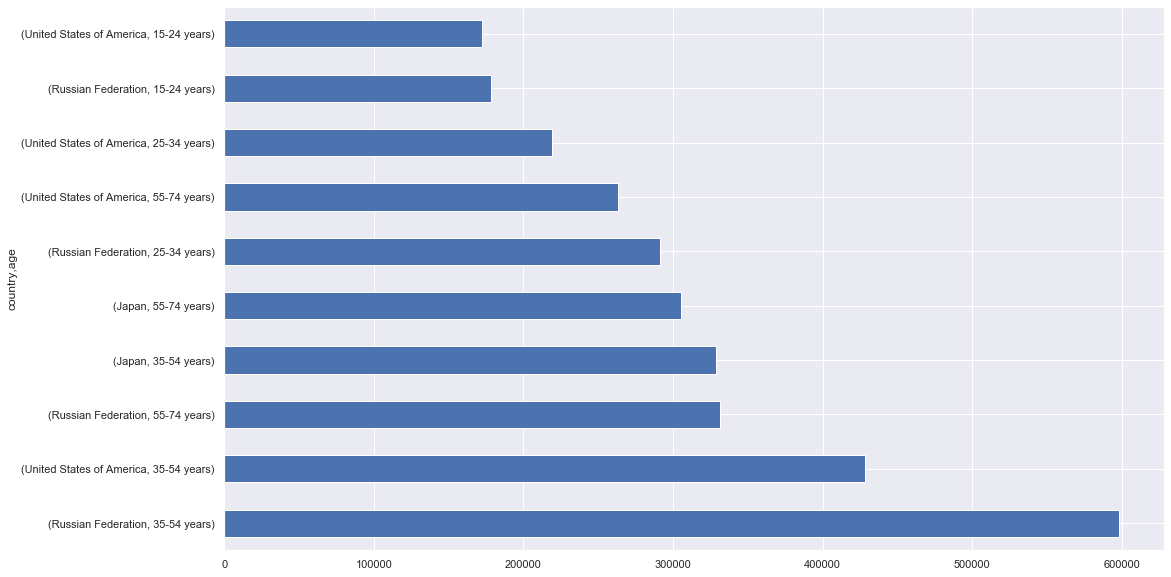

In [10]:
wh.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind='barh')

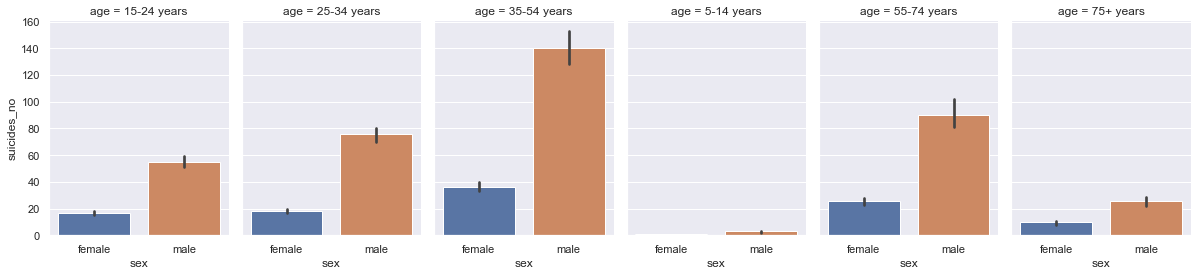

In [11]:
ax = sns.catplot(x="sex", y="suicides_no",col='age', data=wh, estimator=np.median,height=4, aspect=.7,kind='bar')

In [12]:
wh['age'] = wh.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))

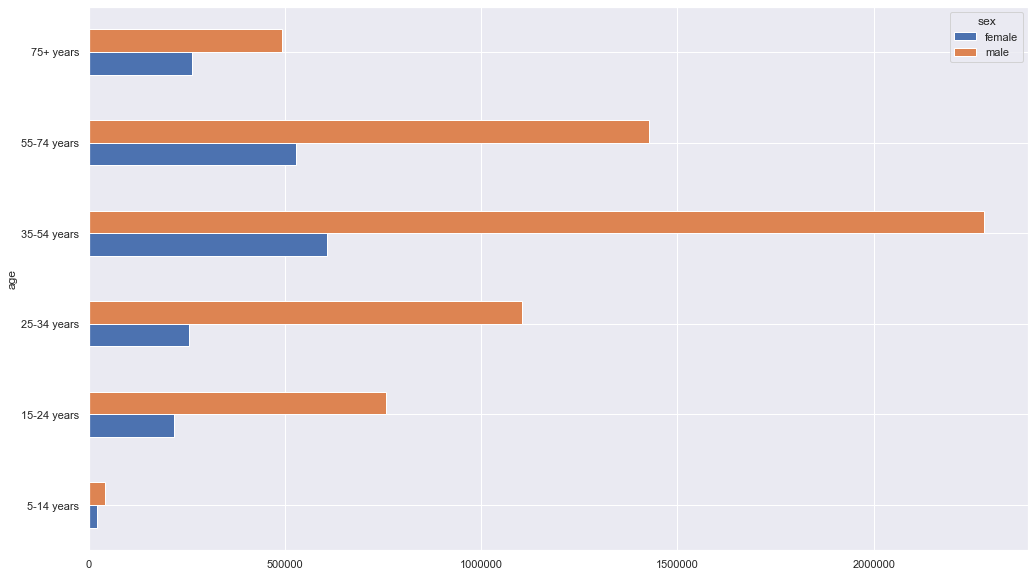

In [13]:
wh.pivot_table(index='age',columns='sex',values='suicides_no', aggfunc='sum').plot(kind='barh')

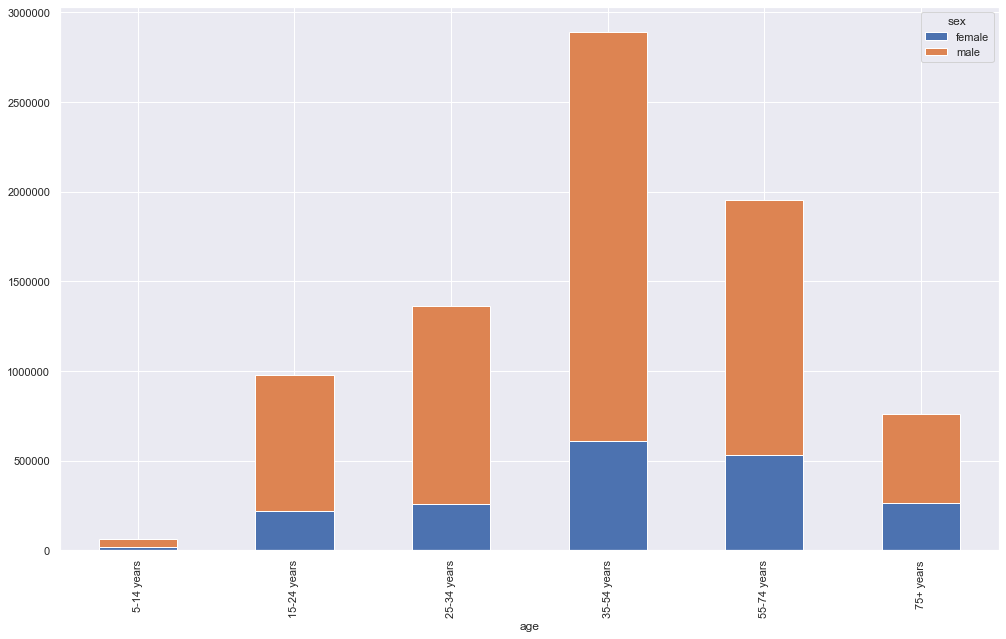

In [14]:
wh.groupby(by=['age','sex'])['suicides_no'].sum().unstack().plot(kind='bar',stacked=True)

In [15]:
wh.groupby(by=['age','sex'])['suicides_no'].sum().unstack().reset_index().melt(id_vars='age')

,age,sex,value
0,5-14 years,female,20152.0
1,15-24 years,female,218309.0
2,25-34 years,female,256427.0
3,35-54 years,female,607420.0
4,55-74 years,female,528359.0
5,75+ years,female,263627.0
6,5-14 years,male,42168.0
7,15-24 years,male,757391.0
8,25-34 years,male,1104353.0
9,35-54 years,male,2280320.0


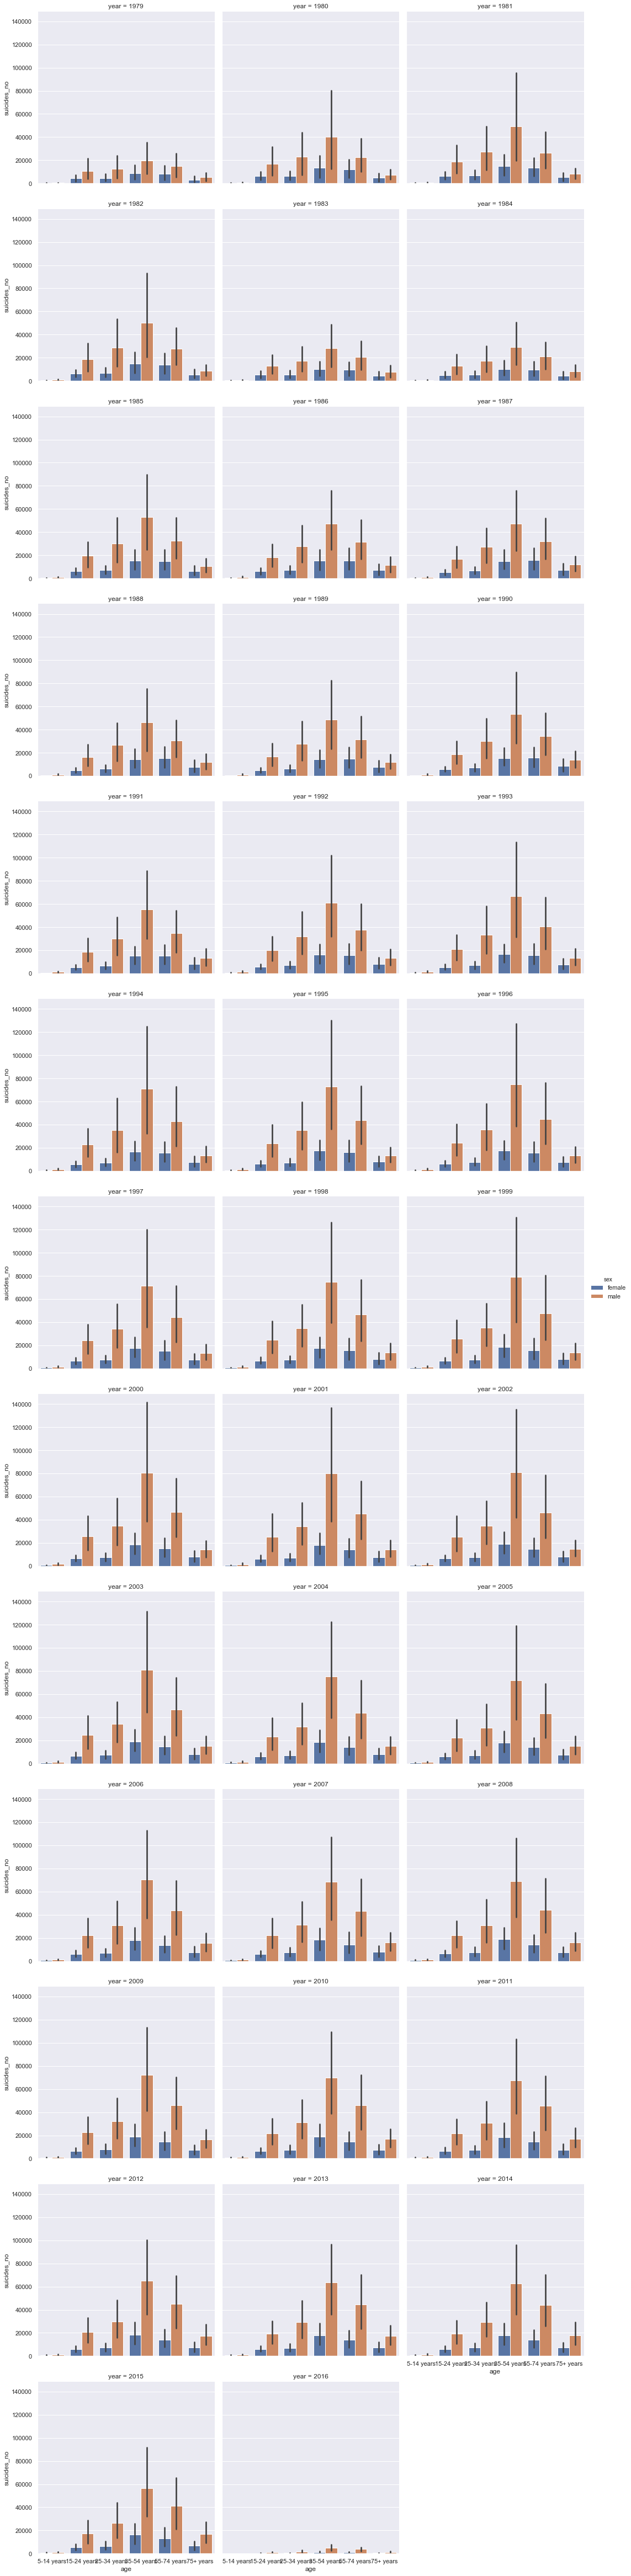

In [16]:
from numpy import sum
sns.catplot('age','suicides_no',hue='sex',col='year',data=wh,kind='bar',col_wrap=3,estimator=sum)

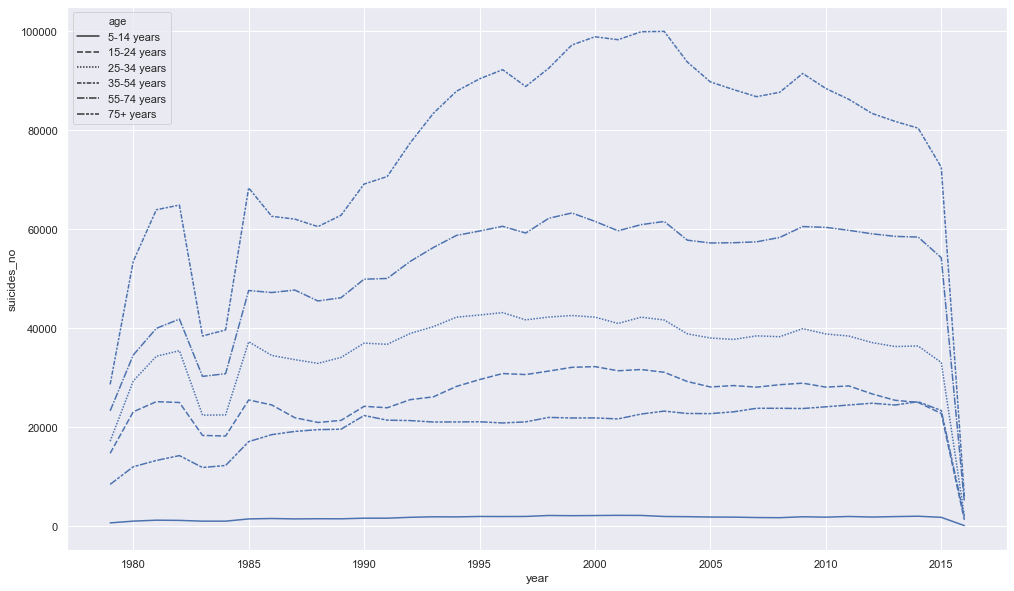

In [17]:
#https://seaborn.pydata.org/generated/seaborn.lineplot.html
from matplotlib.colors import LogNorm
df = wh.groupby(['year','age']).suicides_no.sum().reset_index()
df['age'] = df.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',style='age',data=df,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)

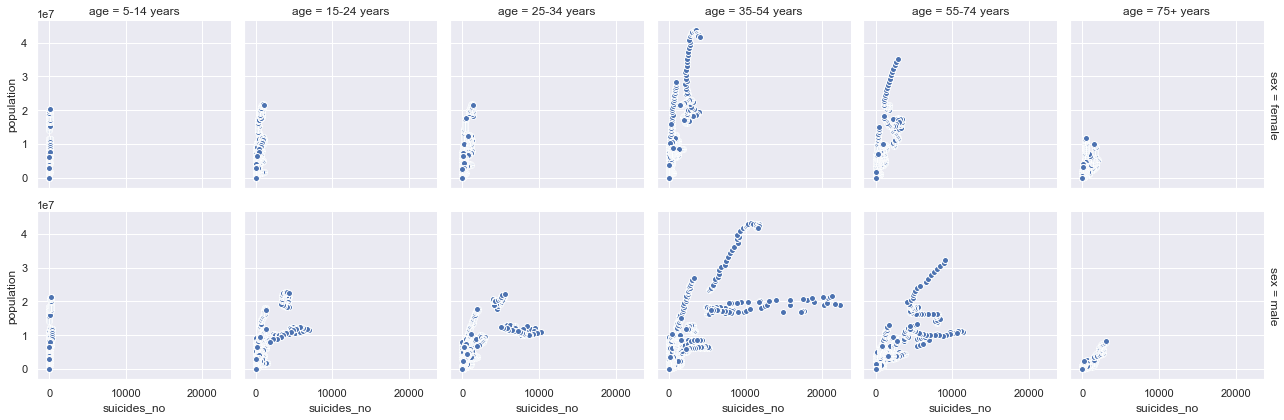

In [18]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

g = sns.FacetGrid(wh, row="sex", col="age", margin_titles=True)

g.map(plt.scatter, "suicides_no","population", edgecolor="w")

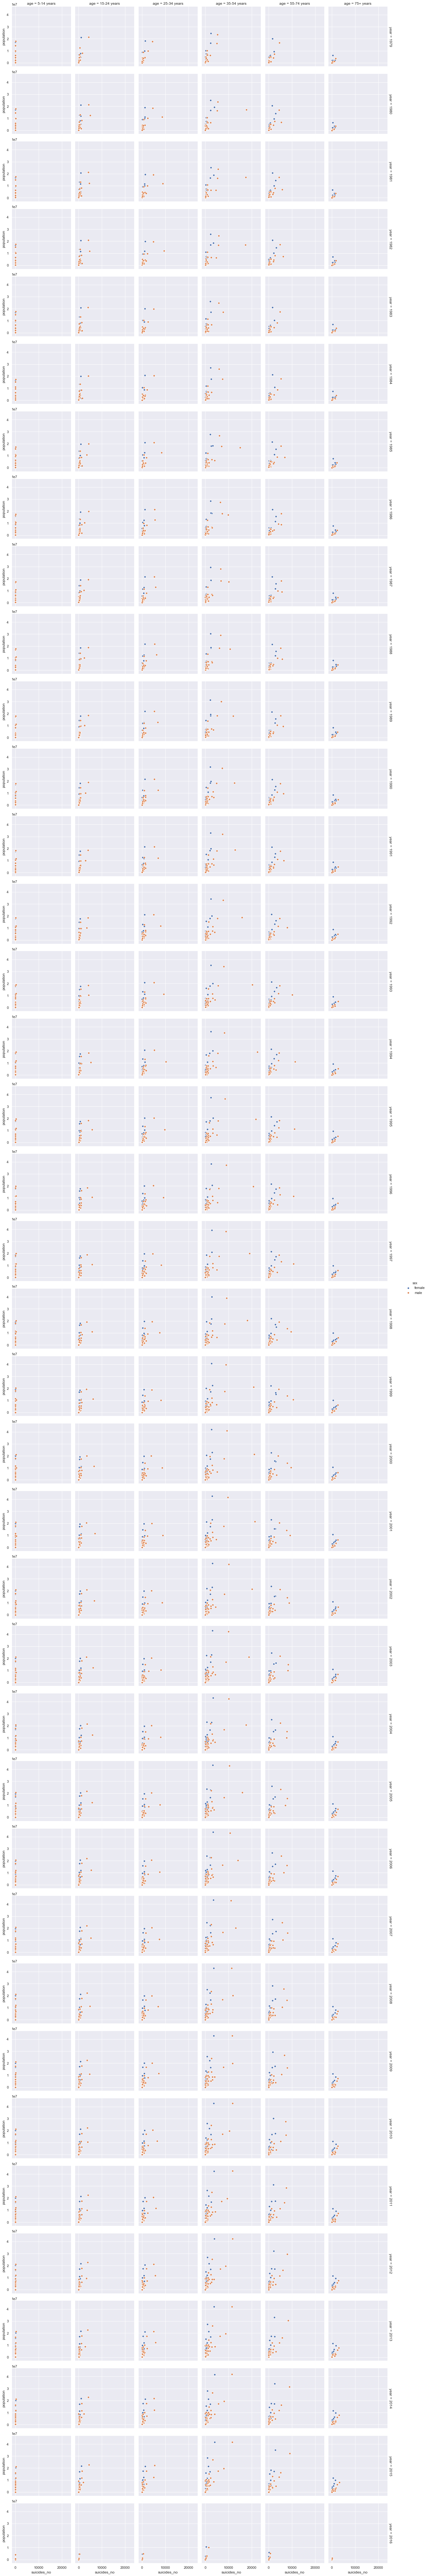

In [19]:
g = sns.FacetGrid(wh, row="year", col="age",hue='sex',margin_titles=True)

(g.map(plt.scatter, "suicides_no","population", edgecolor="w")).add_legend()

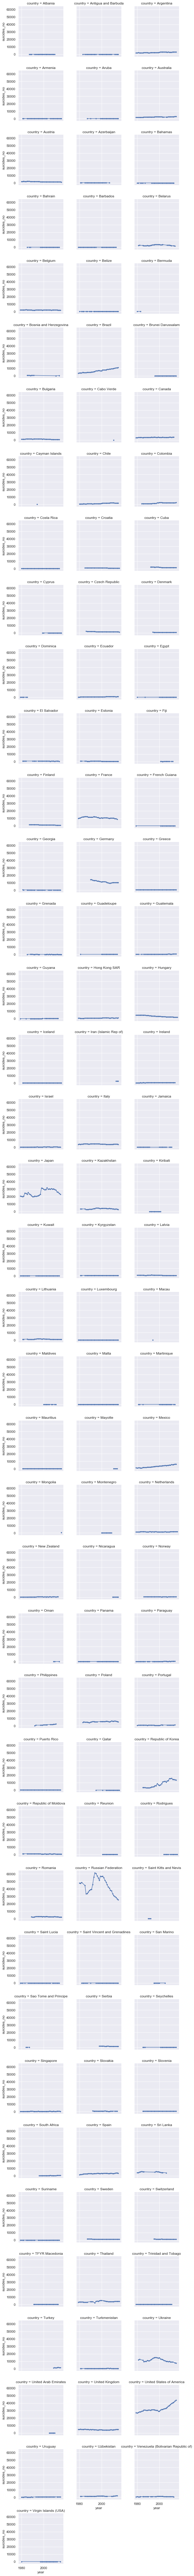

In [20]:
g = sns.FacetGrid(wh.groupby(['country','year']).suicides_no.sum().reset_index(), col="country", col_wrap=3)
g = g.map(plt.plot, "year", "suicides_no", marker=".")

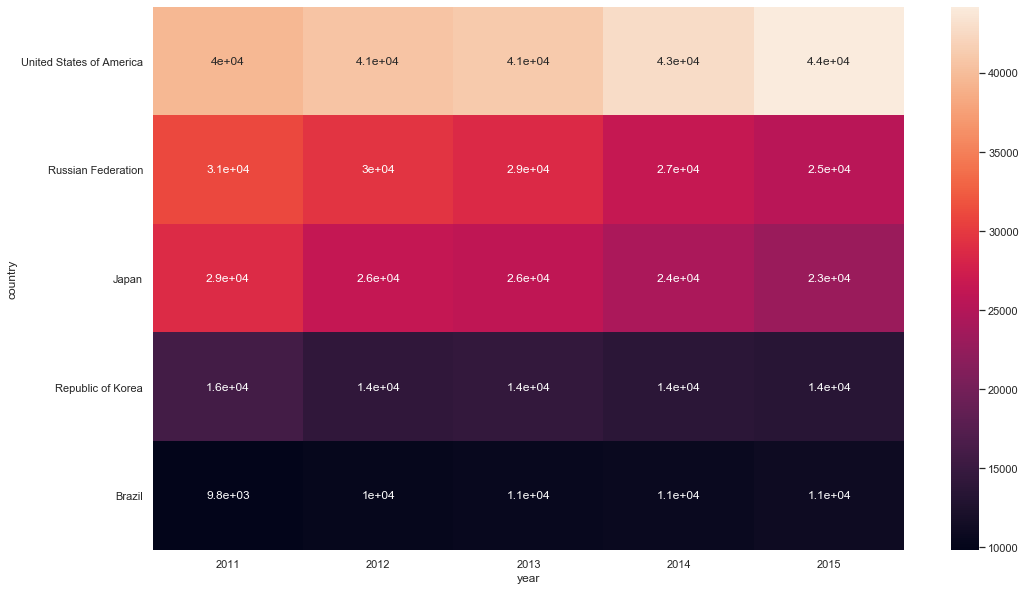

In [21]:
p = pd.crosstab(index=wh.country,columns=wh.year,values=wh.suicides_no,aggfunc='sum')

sns.heatmap(p.loc[:,2011:2015].sort_values(2015, ascending=False).dropna().head(5),annot=True)

pp = pd.crosstab(index=wh.country,columns=wh.year,values=wh.population,aggfunc='sum')

pdivpp = p/pp*10000

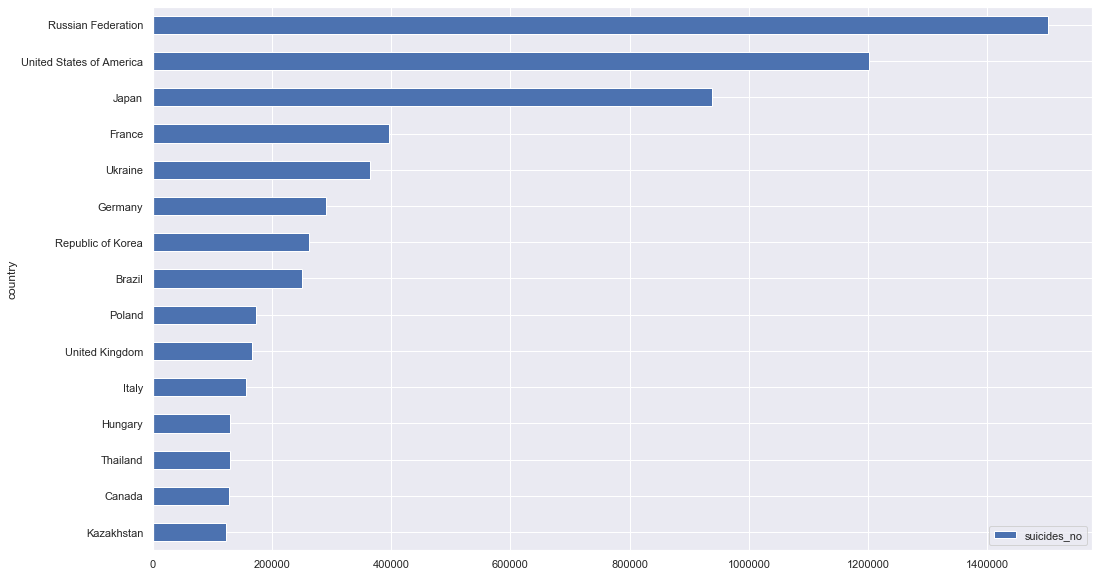

In [22]:
wh.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(15).plot(x='country',y='suicides_no',kind='barh')

In [38]:
happiness = pd.read_csv('https://raw.githubusercontent.com/RyuuKenshi/Mental-Health-and-Suicides/master/datasets/world%20happiness/2016.csv')

In [39]:
happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

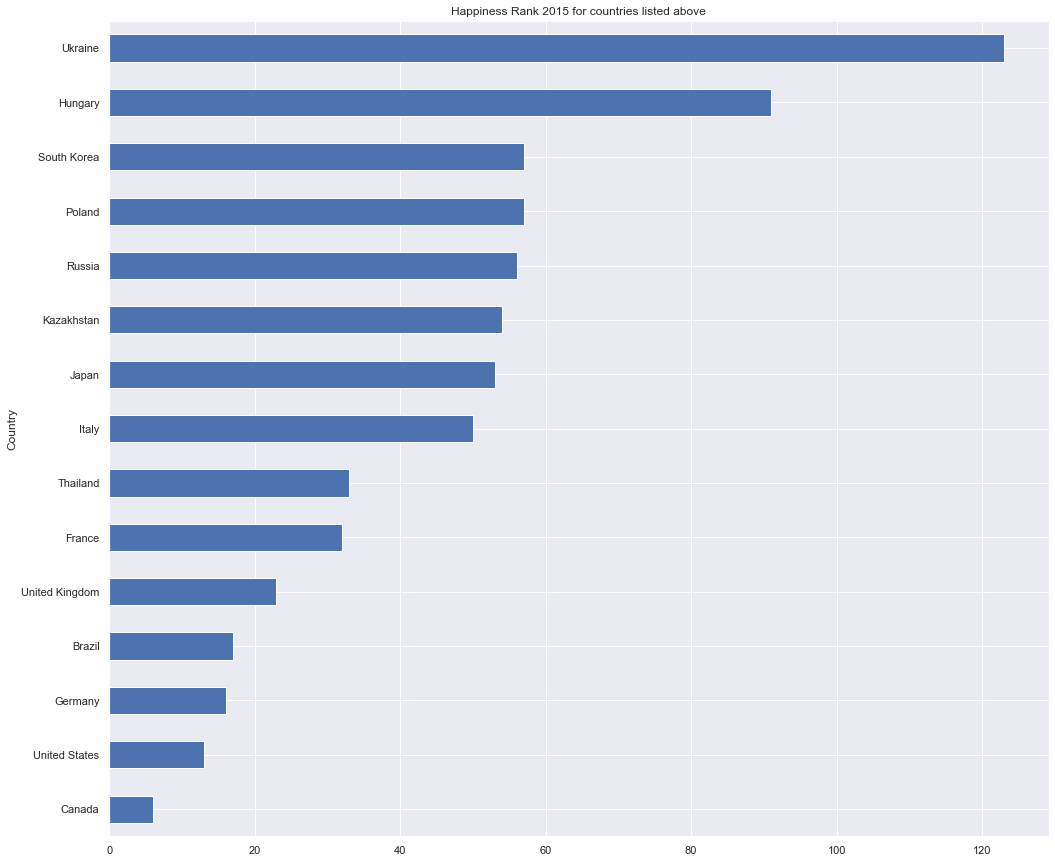

In [40]:
countries = ['Russia','United States','Japan','France','Ukraine','Germany','South Korea',
'Brazil','Poland','United Kingdom','Italy','Hungary','Thailand','Canada','Kazakhstan']
happiness_dr = happiness[happiness.Country.isin(countries)].drop('Region',axis=1).set_index('Country')
sns.set(rc={'figure.figsize':(15,15)})
happiness_dr['Happiness Rank'].plot(kind='barh', title='Happiness Rank 2015 for countries listed above')

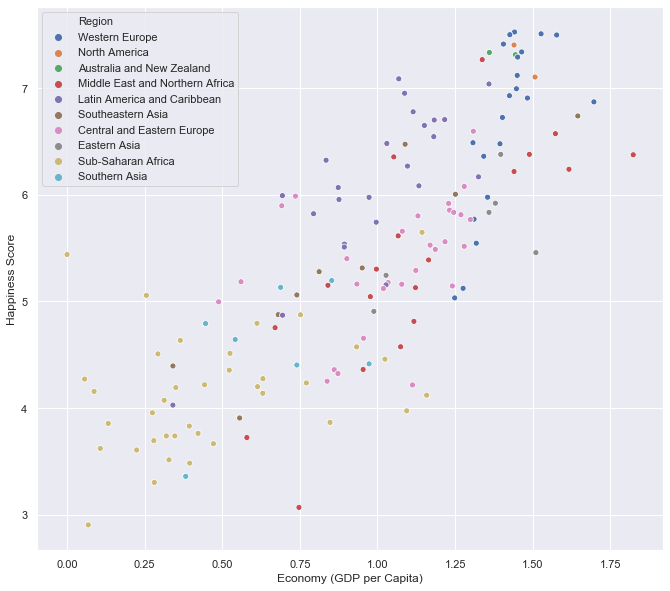

In [41]:
sns.set(rc={'figure.figsize':(10,10)})
#g = sns.FacetGrid(happiness, col="Region",  margin_titles=True, col_wrap=3)

#(g.map(plt.scatter, "Generosity","Happiness Score", edgecolor="w")).add_legend()
sns.scatterplot("Economy (GDP per Capita)","Happiness Score",hue='Region', data=happiness)

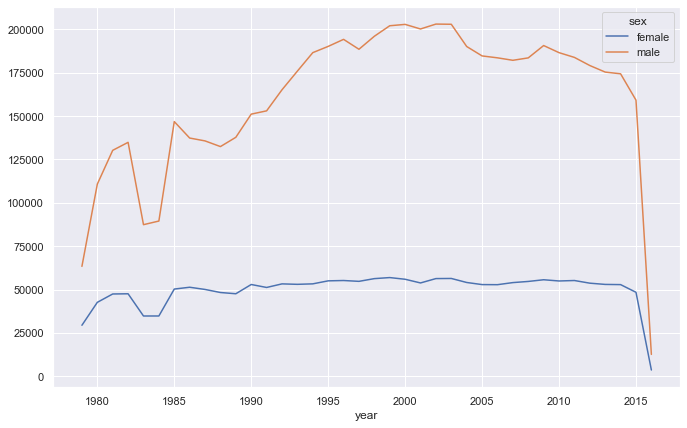

In [42]:
sns.set(rc={'figure.figsize':(10,7)})
wh.pivot_table(index='year',columns='sex',values='suicides_no', aggfunc='sum').plot()

In [43]:
wh.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(15).country

55                   Kazakhstan
20                       Canada
106                    Thailand
47                      Hungary
52                        Italy
112              United Kingdom
79                       Poland
16                       Brazil
83            Republic of Korea
40                      Germany
110                     Ukraine
37                       France
54                        Japan
113    United States of America
88           Russian Federation
Name: country, dtype: object

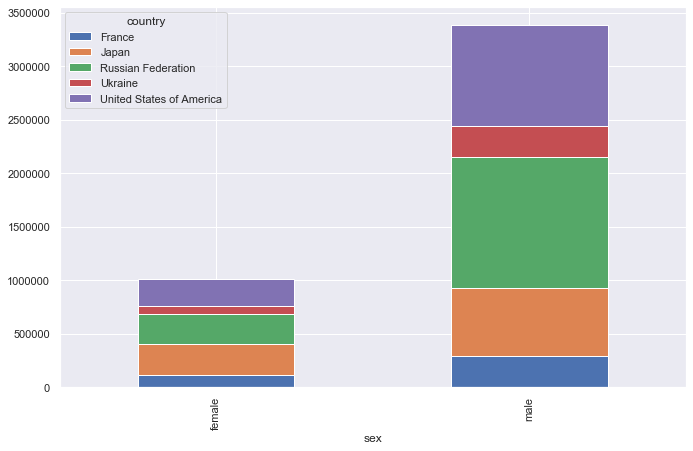

In [44]:
wh[wh.country.isin(wh.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(5).country)].groupby(by=['sex','country'])['suicides_no'].sum().unstack().plot(kind='bar',stacked=True)

In [47]:
'''pd.options.display.max_rows = 200
#wh.pivot_table(index='country',columns='year',values=['suicides_no'], aggfunc=['sum']).count()
pivot_table=wh.pivot_table(index='country',columns='year',values=['suicides_no'], aggfunc=['sum'])
pivot_table'''

"pd.options.display.max_rows = 200\n#wh.pivot_table(index='country',columns='year',values=['suicides_no'], aggfunc=['sum']).count()\npivot_table=wh.pivot_table(index='country',columns='year',values=['suicides_no'], aggfunc=['sum'])\npivot_table"

In [49]:
'''pivot_table_pct_change = pivot_table.pct_change(axis='columns')
pivot_table_pct_change.columns = pivot_table_pct_change.columns.droplevel().droplevel()
pivot_table_pct_change'''

"pivot_table_pct_change = pivot_table.pct_change(axis='columns')\npivot_table_pct_change.columns = pivot_table_pct_change.columns.droplevel().droplevel()\npivot_table_pct_change"

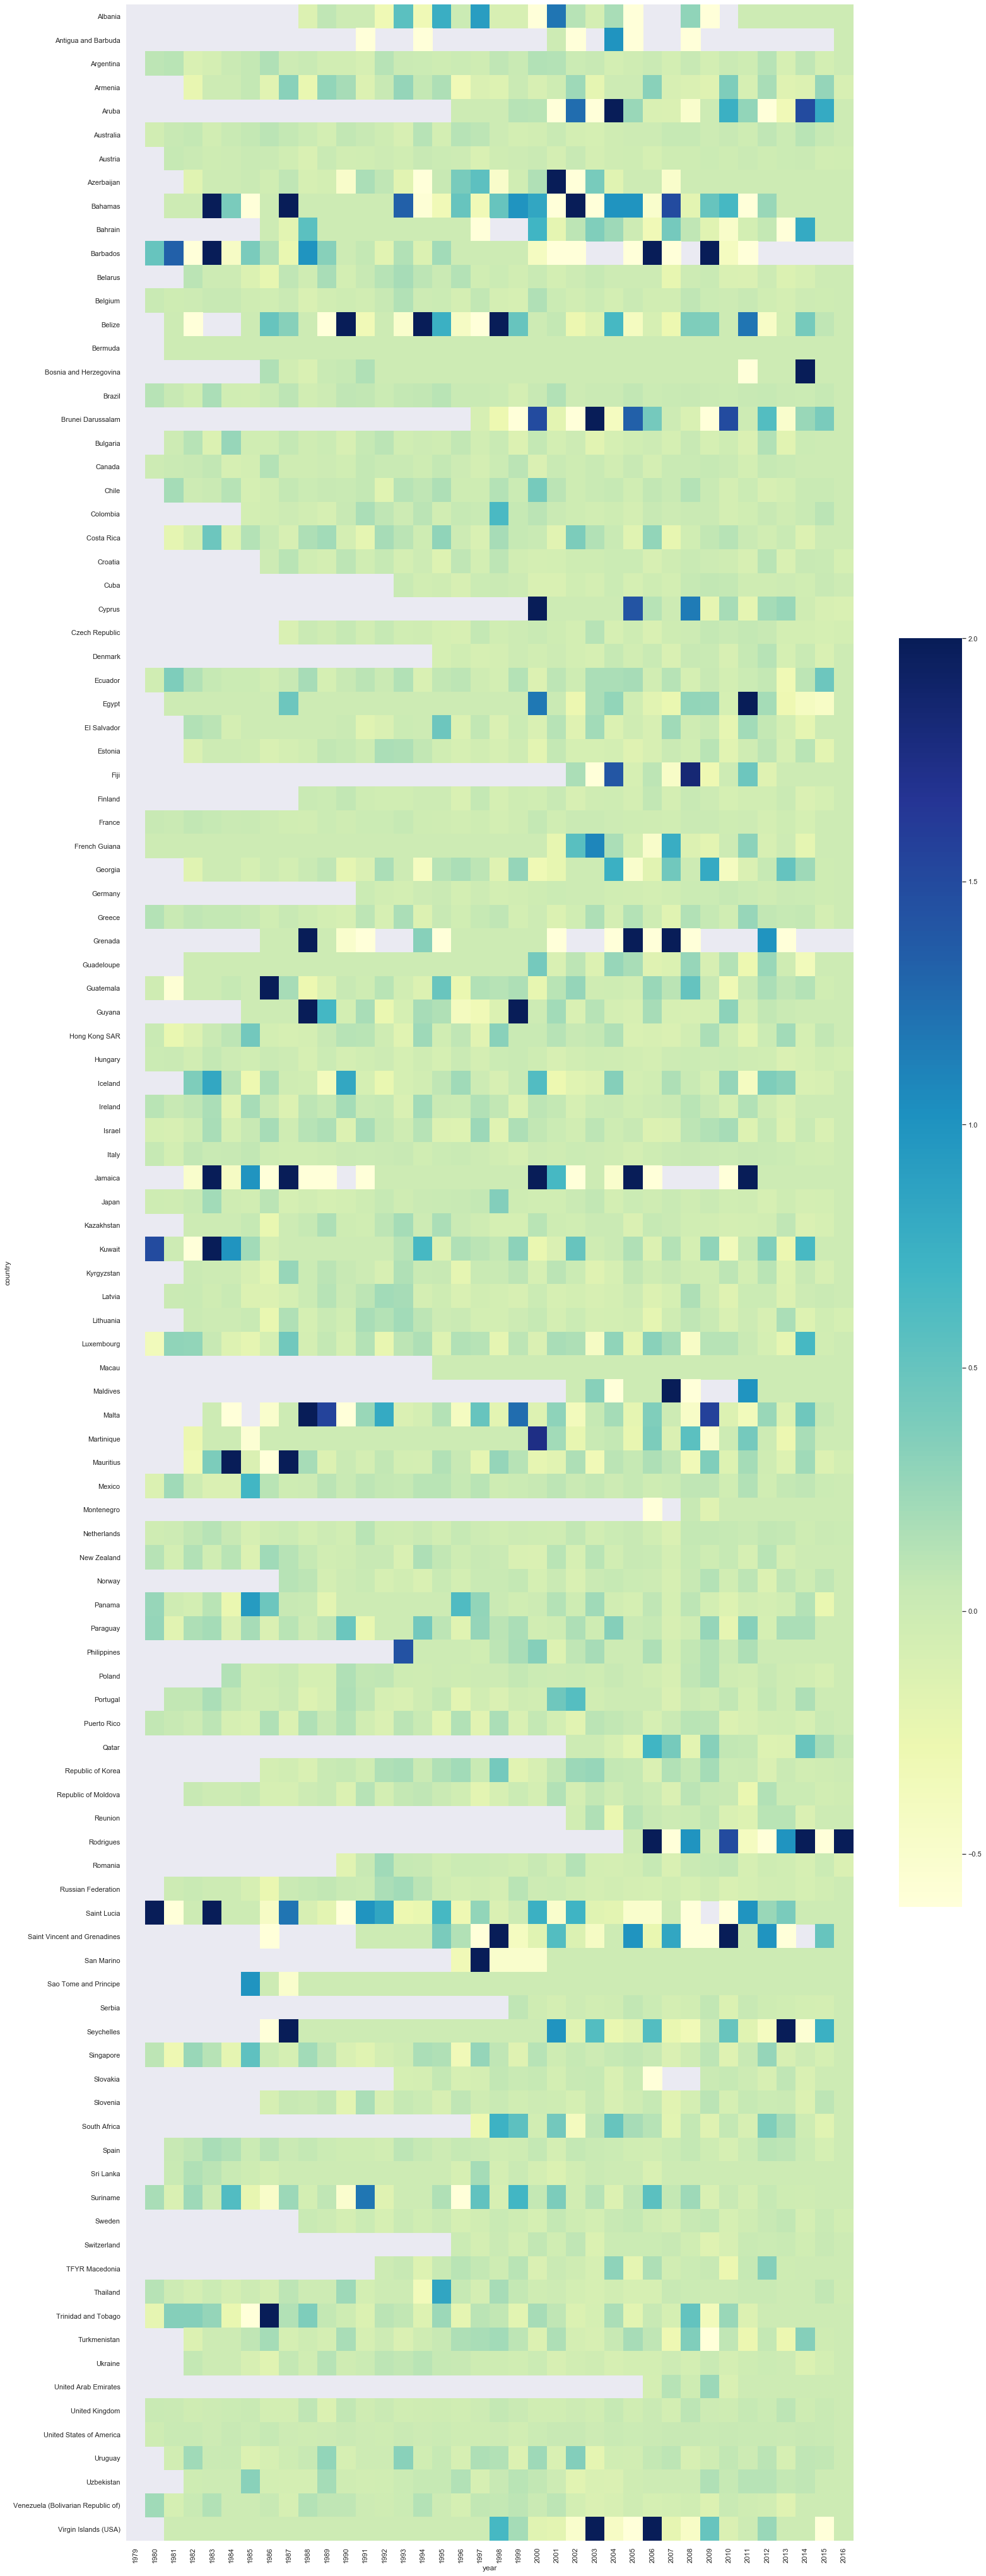

In [50]:
sns.set(rc={'figure.figsize':(23,74)})
sns.heatmap(pivot_table_pct_change.dropna(axis=0,thresh=10), cmap="YlGnBu",robust=True,cbar_kws={"shrink": 0.5})
plt.xticks(rotation=90) 
plt.show()

In [51]:
country_data = pivot_table.T.reset_index()
country_data.set_index('year', inplace=True)
cols_to_drop_pivot = [0,1]
country_data.drop(country_data.columns[cols_to_drop_pivot], axis=1,inplace=True)

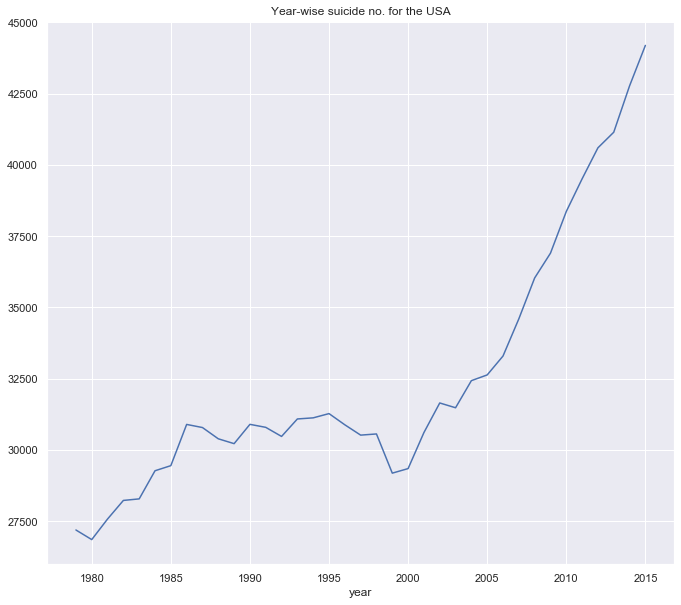

In [56]:
sns.set(rc={'figure.figsize':(10,10)})
country_data['United States of America'].plot(title='Year-wise suicide no. for the USA')


In [58]:
'''pivot_table_pop =wh.pivot_table(index='country',columns='year',values=['population'], aggfunc=['sum'])

population_data = pivot_table_pop.T.reset_index()
population_data.set_index('year', inplace=True)
cols_to_drop_pivot = [0,1]
population_data.drop(population_data.columns[cols_to_drop_pivot], axis=1,inplace=True)

suicide_rate_per_lakh = country_data/population_data*100000
suicide_rate_per_lakh_melt = suicide_rate_per_lakh.reset_index().melt(id_vars='year')'''

In [59]:
suicide_socio_economic = pd.read_csv('https://raw.githubusercontent.com/RyuuKenshi/Mental-Health-and-Suicides/master/datasets/suicide%20rates.csv')

In [60]:
suicide_socio_economic.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

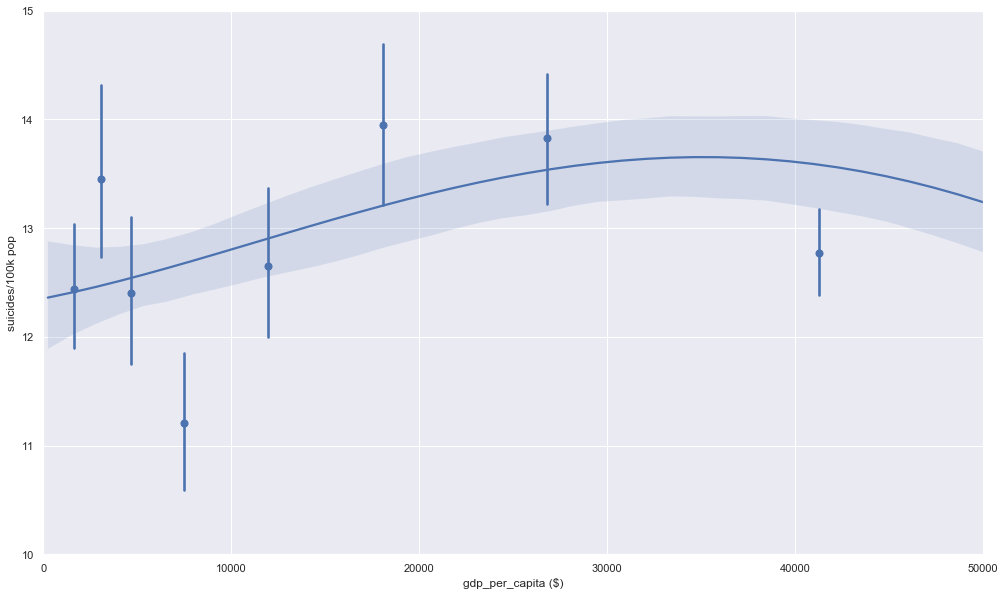

In [69]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
#ax=sns.regplot(data=suicide_socio_economic, x='gdp_per_capita ($)', y='suicides/100k pop', x_estimator=np.median, x_jitter=0.2, order=4, x_bins=5)
ax=sns.regplot(data=suicide_socio_economic, x='gdp_per_capita ($)', y='suicides/100k pop', x_jitter=0.2, order=4, x_bins=8).set(xlim=(0,50000),ylim=(10,15))